In [1]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds
plt.rc(group = 'figure', figsize = (4, 4))

In [2]:
os.getcwd()

'C:\\Users\\fins\\Documents\\project\\code'

In [ ]:
os.chdir('../../data')

In [4]:
sorted(os.listdir())

['APT_Data_Prep.csv',
 'APT_Detail_Seoul_2024.csv',
 'APT_Detail_Seoul_2024.xlsx',
 'APT_Price.csv',
 'APT_Price.pkl',
 'APT_Price.xlsx',
 'APT_Price_Seoul_Merged_2020~2024.csv',
 'APT_Price_Seoul_Merged_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2020.csv',
 'APT_Price_Seoul_Split_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2021.csv',
 'APT_Price_Seoul_Split_2022.csv',
 'APT_Price_Seoul_Split_2023.csv',
 'APT_Price_Seoul_Split_2024.csv',
 'Cereal.pkl',
 'Diabetes.pkl',
 'Marine_Product.csv',
 'Marine_Product.pkl',
 'Marine_Product.xlsx',
 'NA_Sample.xlsx',
 'Pivot_Table_Marine.xlsx',
 'Pivot_table_APT.xlsx',
 'Used_Cars.csv',
 'Used_Cars.pkl',
 'Used_Cars.xlsx',
 'Used_Cars_Prep.pkl',
 'WhiteWine.pkl',
 'dtc_full.png',
 'dtr_full.png',
 'test.png']

In [5]:
objs = pd.read_pickle('Diabetes.pkl')

In [6]:
globals().update(objs)

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
model = GradientBoostingRegressor(subsample = 0.8, random_state = 0)

In [9]:
model.fit(X = X_tr, y = y_tr)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",0.8
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [10]:
model.score(X = X_tr, y = y_tr)

0.8388730168293901

In [11]:
model.score(X = X_vl, y = y_vl)

0.4167063832262541

In [12]:
pd.Series(data = model.feature_importances_, 
          index = model.feature_names_in_) \
  .sort_values(ascending = False)

Glucose          0.616507
BMI              0.090851
SkinThickness    0.077315
Age              0.066384
Pedigree         0.065164
BloodPressure    0.060858
Pregnancies      0.022922
dtype: float64

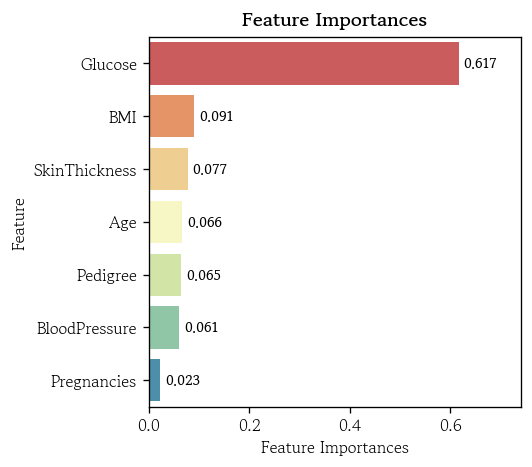

In [13]:
hds.plot.feature_importance(model)

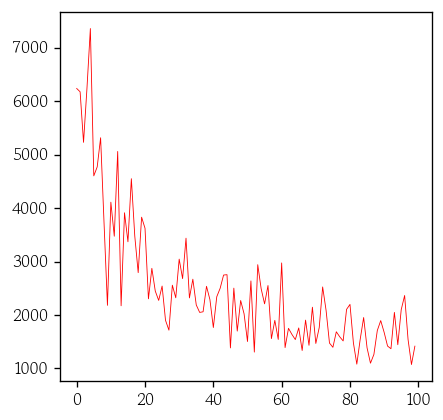

In [14]:
sns.lineplot(x = range(model.n_estimators_), 
             y = model.oob_scores_, 
             color = 'red', 
             linewidth = 0.5);

In [15]:
y_pred = model.predict(X = X_vl)

In [16]:
hds.stat.regmetrics(y_true = y_vl, y_pred = y_pred)

,metric,score,description
0,R^2,0.416706,R Squared
1,MSE,6368.217395,Mean Squared Error
2,RMSE,79.801111,Root Mean Squared Error
3,MSLE,0.168460,Mean Squared Log Error
4,RMSLE,0.410439,Root Mean Squared Log Error
5,MAE,44.995407,Mean Absolute Error
6,MAPE,0.318627,Mean Absolute Percentage Error


In [22]:
model = GradientBoostingRegressor(n_estimators = 500,
                                  subsample = 0.8, 
                                  random_state = 0)

In [23]:
model.fit(X = X_tr, y = y_tr)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",500
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",0.8
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [24]:
model.score(X = X_tr, y = y_tr)

0.9831912298679036

In [25]:
model.score(X = X_vl, y = y_vl)

# n_tree = 1000 -> 0.3763223629860537
# n_tree = 500 -> 0.39229664109535345

0.39229664109535345

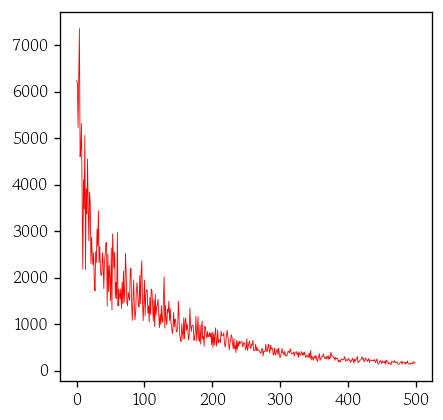

In [26]:
sns.lineplot(x = range(model.n_estimators_), 
             y = model.oob_scores_, 
             color = 'red', 
             linewidth = 0.5);

In [27]:
y_pred = model.predict(X = X_vl)

In [28]:
hds.stat.regmetrics(y_true = y_vl, y_pred = y_pred)

,metric,score,description
0,R^2,0.392297,R Squared
1,MSE,6634.715331,Mean Squared Error
2,RMSE,81.453762,Root Mean Squared Error
3,MSLE,NaN,Mean Squared Log Error
4,RMSLE,NaN,Root Mean Squared Log Error
5,MAE,48.719727,Mean Absolute Error
6,MAPE,0.359284,Mean Absolute Percentage Error
